In [14]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Clean data
transform categorical to numerical, ksk använda label encoder

In [15]:
df = pd.read_csv('CVD_cleaned.csv')

In [13]:
print(df.head())

  Heart_Disease Skin_Cancer Other_Cancer Depression Diabetes Arthritis  \
0            No          No           No         No       No       Yes   
1           Yes          No           No         No      Yes        No   
2            No          No           No         No      Yes        No   
3           Yes          No           No         No      Yes        No   
4            No          No           No         No       No        No   

  Age_Category  Height_(cm)  Weight_(kg)       BMI  ...  \
0        70-74    -1.934250    -2.386180 -2.159696  ...   
1        70-74    -0.526857    -0.303547 -0.051548  ...   
2        60-64    -0.714510     0.227770  0.742649  ...   
3        75-79     0.880535     0.461569  0.015913  ...   
4          80+     1.912623     0.227770 -0.652562  ...   

   Alcohol_Consumption_21.0  Alcohol_Consumption_22.0  \
0                     False                     False   
1                     False                     False   
2                     False  

In [16]:
print(df.dtypes)


General_Health                   object
Checkup                          object
Exercise                         object
Heart_Disease                    object
Skin_Cancer                      object
Other_Cancer                     object
Depression                       object
Diabetes                         object
Arthritis                        object
Sex                              object
Age_Category                     object
Height_(cm)                     float64
Weight_(kg)                     float64
BMI                             float64
Smoking_History                  object
Alcohol_Consumption             float64
Fruit_Consumption               float64
Green_Vegetables_Consumption    float64
FriedPotato_Consumption         float64
dtype: object


In [17]:
categorical_columns = ['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 
                       'Skin_Cancer', 'Other_Cancer', 'Depression', 'Diabetes', 
                       'Arthritis', 'Sex', 'Age_Category', 'Smoking_History']

In [18]:
label_encoder = LabelEncoder()
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column].astype(str))

In [19]:
numerical_columns = ['Height_(cm)', 'Weight_(kg)', 'BMI', 
                     'Fruit_Consumption', 'Green_Vegetables_Consumption', 
                     'FriedPotato_Consumption'] + categorical_columns

In [25]:
print(df.dtypes)

General_Health                  float64
Checkup                         float64
Exercise                        float64
Heart_Disease                   float64
Skin_Cancer                     float64
Other_Cancer                    float64
Depression                      float64
Diabetes                        float64
Arthritis                       float64
Sex                             float64
Age_Category                    float64
Height_(cm)                     float64
Weight_(kg)                     float64
BMI                             float64
Smoking_History                 float64
Alcohol_Consumption             float64
Fruit_Consumption               float64
Green_Vegetables_Consumption    float64
FriedPotato_Consumption         float64
cluster                           int32
dtype: object


In [26]:
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,cluster
0,0.486392,-1.485982,-1.856251,-0.296584,-0.327962,-0.32726,-0.500659,-0.425409,1.433810,-0.963315,0.983140,-1.934250,-2.386180,-2.159696,1.210630,0.0,0.006625,0.059597,0.664502,0
1,1.155689,0.475622,-1.856251,3.371722,-0.327962,-0.32726,-0.500659,2.335566,-0.697442,-0.963315,0.983140,-0.526857,-0.303547,-0.051548,-0.826016,0.0,0.006625,-1.012342,-0.267579,0
2,1.155689,0.475622,0.538720,-0.296584,-0.327962,-0.32726,-0.500659,2.335566,-0.697442,-0.963315,0.415526,-0.714510,0.227770,0.742649,-0.826016,4.0,-0.716973,-0.811354,1.130543,0
3,0.486392,0.475622,0.538720,3.371722,-0.327962,-0.32726,-0.500659,2.335566,-0.697442,1.038082,1.266947,0.880535,0.461569,0.015913,-0.826016,0.0,0.006625,0.997544,0.198462,0
4,-0.182904,0.475622,-1.856251,-0.296584,-0.327962,-0.32726,-0.500659,-0.425409,-0.697442,1.038082,1.550754,1.912623,0.227770,-0.652562,1.210630,0.0,-0.877772,-0.744358,-0.733620,0


In [20]:
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [21]:
kmeans = KMeans(n_clusters=3, random_state=0)
df['cluster'] = kmeans.fit_predict(df)

In [22]:
print("\nAntal observationer per kluster:")
print(df['cluster'].value_counts())


Antal observationer per kluster:
cluster
0    229507
2     47076
1     32271
Name: count, dtype: int64


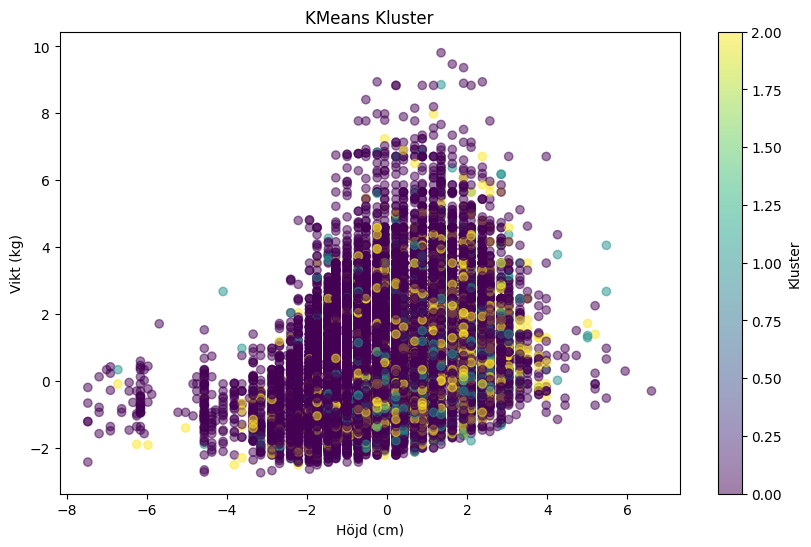

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Height_(cm)'], df['Weight_(kg)'], c=df['cluster'], cmap='viridis', alpha=0.5)
plt.title('KMeans Kluster')
plt.xlabel('Höjd (cm)')
plt.ylabel('Vikt (kg)')
plt.colorbar(label='Kluster')
plt.show()